In [5]:
import pandas as pd
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
#df=pd.read_csv('https://raw.githubusercontent.com/santhoshpkumar/StudentAdmissionsKeras/master/student_data.csv')
#df.to_csv('student_data.csv')
df=pd.read_csv('student_data.csv').dropna()
#df=pd.read_csv('student_data2.csv').dropna()
print(df.columns)
print(df.info())
print(len(df))

Index(['Unnamed: 0', 'admit', 'gre', 'gpa', 'ses', 'Gender_Male', 'Race',
       'rank', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-',
       'F', 'Grade', 'Grade_enc'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   admit        400 non-null    int64  
 2   gre          400 non-null    int64  
 3   gpa          400 non-null    float64
 4   ses          400 non-null    int64  
 5   Gender_Male  400 non-null    int64  
 6   Race         400 non-null    int64  
 7   rank         400 non-null    int64  
 8   A            400 non-null    int64  
 9   A-           400 non-null    int64  
 10  B+           400 non-null    int64  
 11  B            400 non-null    int64  
 12  B-           400 non-null    int64  
 13  C+           400 non-null    int64  
 14  C         

In [8]:
gpa =df['gpa']
df['A']=df['gpa'].apply(lambda x: 1 if ((x<=4.0) & (x>3.7)) else 0)
df['A-']=df['gpa'].apply(lambda x: 1 if ((x<=3.7) & (x>3.3)) else 0)
df['B+']=df['gpa'].apply(lambda x: 1 if (x<=3.3) & (x>3.0) else 0)
df['B']=df['gpa'].apply(lambda x: 1 if (x<=3.0) & (x>2.7) else 0)
df['B-']=df['gpa'].apply(lambda x: 1 if (x<=2.7) & (x>2.3) else 0)
df['C+']=df['gpa'].apply(lambda x: 1 if (x<=2.3) & (x>2.0) else 0)
df['C']=df['gpa'].apply(lambda x: 1 if (x<=2.0) & (x>1.7) else 0)
df['C-']=df['gpa'].apply(lambda x: 1 if (x<=1.7) & (x>1.3) else 0)
df['D+']=df['gpa'].apply(lambda x: 1 if (x<=1.3) & (x>1.2) else 0)
df['D']=df['gpa'].apply(lambda x: 1 if (x<=1.2) & (x>1.1) else 0)
df['D-']=df['gpa'].apply(lambda x: 1 if (x<=1.1) & (x>.9) else 0)
df['F']=df['gpa'].apply(lambda x: 1 if (x<1) else 0)

df['Grade']=''

for key, value in df.iterrows():
    if value['A']==1:
        df.loc[key,'Grade']='A'
    elif value['A-']==1:
        df.loc[key,'Grade']='A-'
    elif value['B+']==1:
        df.loc[key,'Grade']='B+'
    elif value['B']==1:
        df.loc[key,'Grade']='B'
    elif value['B-']==1:
        df.loc[key,'Grade']='B-'
    elif value['C+']==1:
        df.loc[key,'Grade']='C+'
    elif value['C']==1:
        df.loc[key,'Grade']='C'
    elif value['C-']==1:
        df.loc[key,'Grade']='C-'
    elif value['D+']==1:
        df.loc[key,'Grade']='D+'
    elif value['D']==1:
        df.loc[key,'Grade']='D'
    elif value['D-']==1:
        df.loc[key,'Grade']='D-'
    elif value['F']==1:
        df.loc[key,'Grade']='F'
        
encoder=preprocessing.LabelEncoder()        
df['Grade_enc']=encoder.fit_transform(df['Grade'])

NUMERIC=['gre','Grade_enc']
y=df['admit']
X=df[NUMERIC]



In [21]:

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.6,random_state=42)

scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

lr_model=LogisticRegression(C=100)
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
print(y_pred)
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))

#svm_model= svm.SVC(kernel='linear',C=1,gamma='auto')
#svm_model= svm.SVC(kernel='poly', degree=3, C=1E10 gamma='scale')
svm_model = SVC(kernel='linear',C=1E7) 
svm_model.fit(X_train,y_train)
y_pred2=svm_model.predict(X_test)
print(y_pred2)

    #print("Test Label={} Predicted={}".format(y_test[i],y_pred2[i]))
#score=svm.score(y_test,y_predict)


print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred2))

#original_variables=list(X_train.columns)

#zipped_together=list(zip(original_variables,lr_model.coef_[0]))
#coefs = [list(x) for x in zipped_together]

#coefs=pd.DataFrame(coefs, columns=['Variable','Coefficient'])


#coefs.sort_values(by=['Coefficient'], axis=0, inplace=True, ascending=False)

#print(coefs)

print ("grades are not a consistent main feature for determining admission into a graduate school")

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: Set

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]
LR Accuracy: 0.675
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]
SVM A

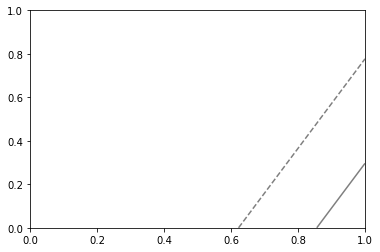

In [22]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plot_svc_decision_function(svm_model)    

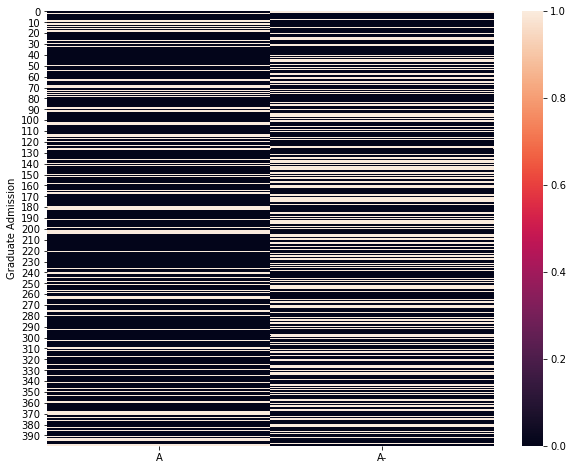

Text(0.5, 1.0, 'gre vs gpa admission')

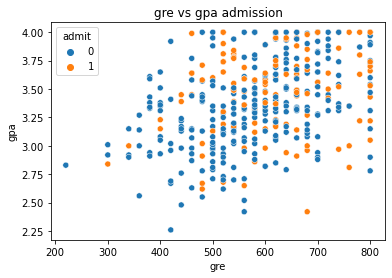

In [23]:
plt.figure(figsize=(10,8))
X2=pd.DataFrame()
#X2['Target']=df['Target'].apply(lambda x: 1 if ((x=='moderate') | (x=='severe')) else 0)
#X2['Target']=df[['A','A-']]
#X2=X2.reset_index()
sns.heatmap(df[['A','A-']])
plt.ylabel("Graduate Admission")
plt.show()

sns.scatterplot(data=df,x='gre',y='gpa',hue='admit')
plt.title('gre vs gpa admission')

In [24]:
print("Grade ", df['Grade'].value_counts(), '\n')
print("GRE ",df['gre'].value_counts(), '\n')
print("Admitted ",df['admit'].value_counts(), '\n')

Grade  A-    153
A      91
B+     85
B      54
B-     16
C+      1
Name: Grade, dtype: int64 

GRE  620    30
580    29
540    27
800    25
520    24
560    24
660    24
600    23
700    22
640    21
500    21
680    20
480    16
460    14
720    11
400    11
740    11
440    10
380     8
420     7
780     5
760     5
340     4
360     4
300     3
220     1
Name: gre, dtype: int64 

Admitted  0    273
1    127
Name: admit, dtype: int64 



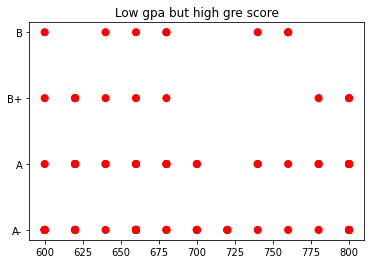

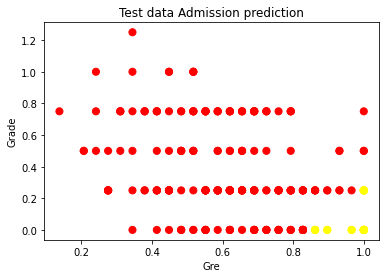

if you have have a high gpa and a high gre then odds are good you will be admitted into graduate school


In [27]:
#print(X['gre'].median())
#print(df['gpa'].median())
label={0:'A',1:'A-',2:'B+',3:'B',4:'B-',5:'C+',6:'C',7:'C-',8:'D+',9:'D',10:'D-',11:'F'}
filter=(df['gre']>580) & (df['Grade_enc']<=3) & (df['admit']==1)
plt.clf()
plt.scatter(df[filter]['gre'], df[filter]['Grade'],c=df[filter]['admit'], s=50, cmap='autumn') 
plt.title('Low gpa but high gre score')
plt.show()


plt.scatter(X_test['gre'], X_test['Grade_enc'],s=50, c=y_pred2, cmap='autumn')  
plt.title('Test data Admission prediction')
plt.xlabel('Gre')
plt.ylabel('Grade')
plt.show()


print("if you have have a high gpa and a high gre then odds are good you will be admitted into graduate school")